Olympics Exploratory Data Analytics

1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading datasets

In [2]:
df1 = pd.read_csv("athlete_events.csv")
df2 = pd.read_csv("noc_regions.csv")

3. Information related to our data

In [5]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
df1.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
df2.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [15]:
# Merging both dataset in a single dataset
df = df1.merge(df2, how = 'left', on ='NOC')
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [14]:
df.shape

(271116, 17)

In [16]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

4. Cleaning dataset

In [18]:
# Renaming column names
df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=1)
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [19]:
# Checking for null values
NAN_values = df.isna()
NAN_columns = NAN_values.any()
NAN_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [20]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

5. Ask & answer questions about the data in a Jupyter notebook

In [24]:
# 1. Print out the details of only Pakistani athletes who have participate in Olympics
df.query('Team == "Pakistan"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,NaN,Pakistan,NaN
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,NaN,Pakistan,NaN
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,Pakistan,NaN
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Pakistan,NaN
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Pakistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268234,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 400 metres,NaN,Pakistan,NaN
268235,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,Pakistan,NaN
269610,134907,Qamar Zia,M,22.0,168.0,61.0,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze,Pakistan,NaN
269611,134908,Qasim Zia,M,22.0,174.0,71.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,Pakistan,NaN


In [34]:
# Comparison of Pakistan vs Argentina
Arg = df.query('Team == "Argentina"').describe()
Pak = df.query('Team == "Pakistan"').describe()
print("                   Pakistan's olympic stats\n")
print(Pak)
print("\n\n                 Argentina's olympic stats\n")
print(Arg)

                   Pakistan's olympic stats

                  ID         Age      Height      Weight         Year
count     562.000000  515.000000  367.000000  375.000000   562.000000
mean    57869.603203   25.180583  173.910082   69.853333  1974.405694
std     43340.595647    4.762492    7.035436    9.332600    20.634650
min       111.000000   13.000000  150.000000   45.000000  1948.000000
25%      8431.250000   22.000000  170.000000   64.000000  1956.000000
50%     59132.500000   25.000000  174.000000   70.000000  1968.000000
75%     99053.750000   28.000000  178.000000   75.000000  1992.000000
max    135329.000000   47.000000  195.000000  105.000000  2016.000000


                 Argentina's olympic stats

                  ID          Age       Height       Weight         Year
count    3199.000000  2982.000000  2245.000000  2201.000000  3199.000000
mean    62741.510785    25.698860   176.560356    73.910041  1978.452641
std     39866.999907     6.658024    10.238011    13.982013 

In [46]:
# Top 10 countries with most participation rate in terms of player
most = df.Team.value_counts().sort_values(ascending=False).head(10)
most

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

In [45]:
# Top 12 regions with least participation rate in terms of player
least = df.Region.value_counts().sort_values(ascending=True).head(12)
least

South Sudan               3
Kosovo                    8
Timor-Leste               9
Brunei                   10
Kiribati                 11
Nauru                    13
Marshall Islands         14
Sao Tome and Principe    15
Cape Verde               18
Comoros                  19
Dominica                 19
Palestine                21
Name: Region, dtype: int64

6. Perform exploratory analysis & visualization using Matplotlib & Seaborn

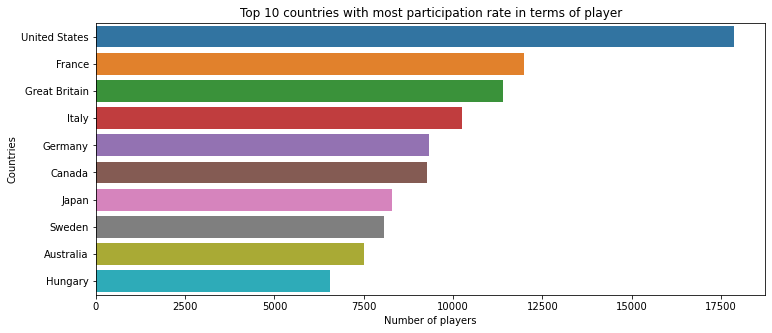

In [47]:
# Barplot of top 10 countries with most participation rate in terms of player
plt.figure(figsize=(12,5))
sns.barplot(x=most, y=most.index)
plt.title("Top 10 countries with most participation rate in terms of player")
plt.xlabel("Number of players")
plt.ylabel("Countries")
plt.show()

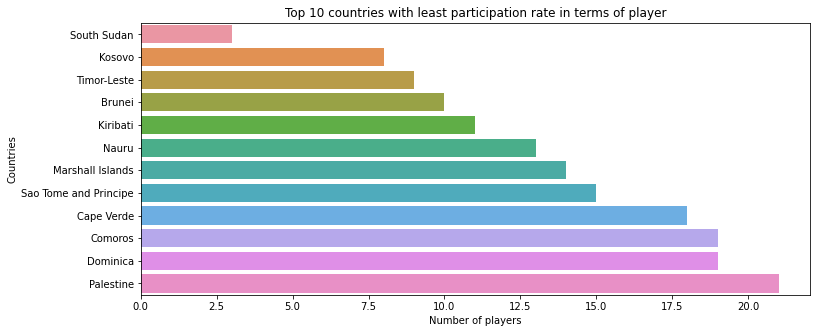

In [48]:
# Barplot of top 10 countries with least participation rate in terms of player
plt.figure(figsize=(12,5))
sns.barplot(x=least, y=least.index)
plt.title("Top 10 countries with least participation rate in terms of player")
plt.xlabel("Number of players")
plt.ylabel("Countries")
plt.show()

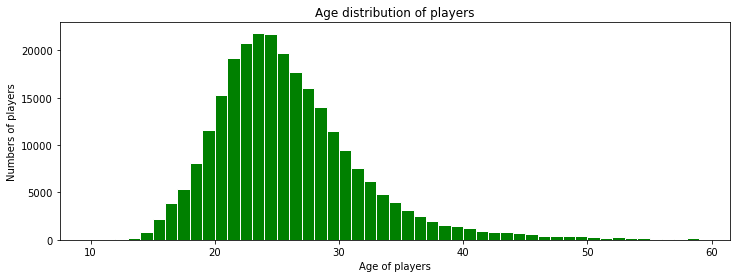

In [49]:
# Age distribution of players using histogram
plt.figure(figsize=(12,4))
plt.hist(df.Age, bins=np.arange(10,60), color="Green", edgecolor = 'white')
plt.title("Age distribution of players")
plt.xlabel('Age of players')
plt.ylabel('Numbers of players')
plt.show()

([<matplotlib.patches.Wedge at 0x1a5c59fc160>,
 [Text(-0.7147310163003325, 0.8361576252945936, 'M'),
  Text(0.7147309380136029, -0.8361576922125369, 'F')],
 [Text(-0.38985328161836313, 0.4560859774334146, '72.513%'),
  Text(0.38985323891651064, -0.45608601393411097, '27.487%')])

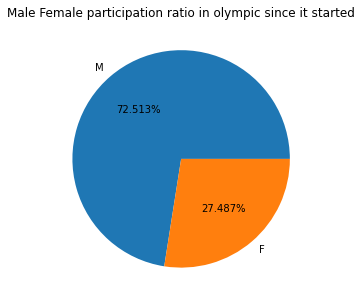

In [54]:
# Pie chart of gender distribution of olympic participation
from tokenize import Whitespace


gender = df.Sex.value_counts()
plt.figure(figsize=(10,5))
plt.title("Male Female participation ratio in olympic since it started")
plt.pie(gender, labels=gender.index, autopct='%1.3f%%')
